# Boosting Examples

+ Using synthetic data

### Packages

In [1]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# modeling packages
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from mlutils import plot_classes, plot_decision_boundary, plot_regression

### Display Settings

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

### Data Generation

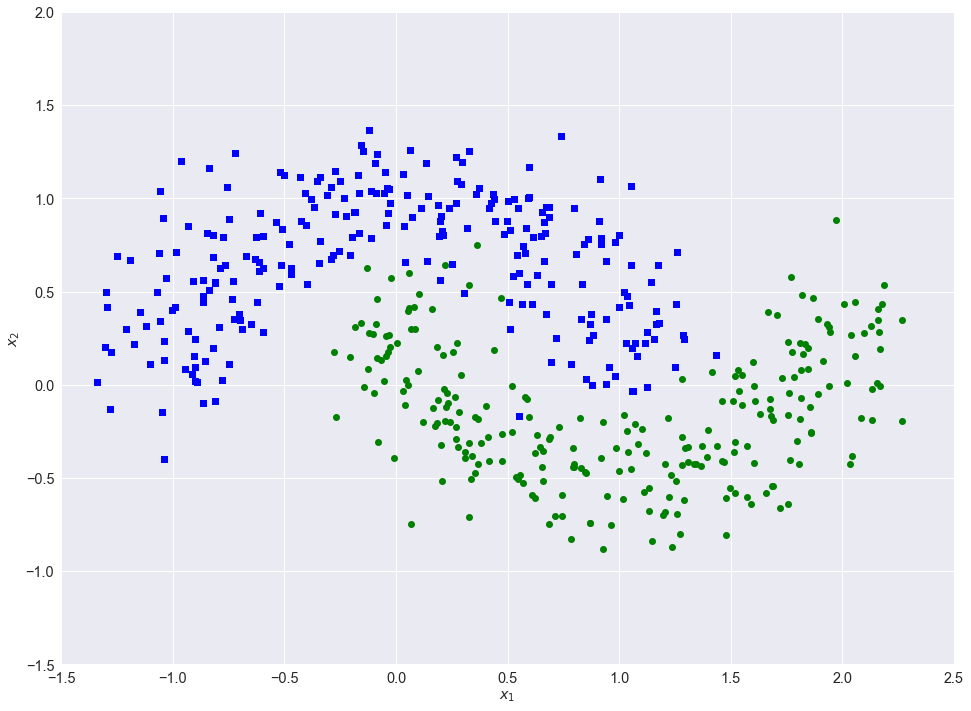

In [3]:
rnd_state = 123
X, y = make_moons(n_samples=500, noise=0.20, random_state=123)

axlim = [-1.5, 2.5, -1.5, 2.0]

# plot the generated 2D data
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

plot_classes(X, y, ax, axlim)
ax.set(xlabel=r"$x_1$", ylabel= r"$x_2$")

# split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## AdaBoost Classification

We fit a random forest and an AdaBoost classifier.

In [4]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=rnd_state)
rnd_clf.fit(X_train, y_train)

lrate0 = 0.5
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=rnd_state)
ada_clf.fit(X_train, y_train)
print(ada_clf)

# compute out-of-sample accuracy for the two models
print('Model                    Accuracy')
print('---------------------------------')
print('{0:24s} {1}'.format('RandomForest', accuracy_score(y_test, rnd_clf.predict(X_test))))
print('{0:24s} {1}'.format('AdaBoost', accuracy_score(y_test, ada_clf.predict(X_test))))



AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=123)
Model                    Accuracy
---------------------------------
RandomForest             0.976
AdaBoost                 0.976


#### Decision Boundaries

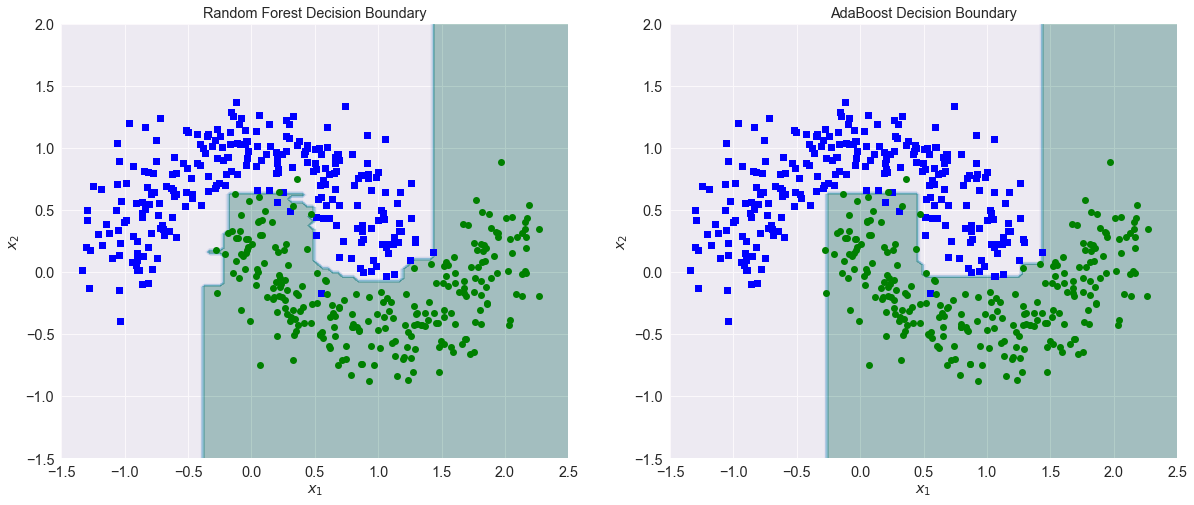

In [6]:
# plot decision boundaries for the random forest and AdaBoost
# Display results
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plot_decision_boundary(rnd_clf, ax1, axlim)
plot_decision_boundary(ada_clf, ax2, axlim)
# plot the observations
ax1.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
ax1.plot(X[:, 0][y==1], X[:, 1][y==1], "go")
ax1.set(xlabel='$x_1$', ylabel='$x_2$', title='Random Forest Decision Boundary')

ax2.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
ax2.plot(X[:, 0][y==1], X[:, 1][y==1], "go")
ax2.set(xlabel='$x_1$', ylabel='$x_2$', title='AdaBoost Decision Boundary');


### Effect of learning rate
Using the Iris Dataset

In [6]:
lrate1 = 2.0
ada1_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=lrate1, random_state=rnd_state)
ada1_clf.fit(X_train, y_train)

# compute out-of-sample accuracy for the two learing rates
print('Model                    Accuracy')
print('---------------------------------')
print('{0:8s} lrate={1:5.3f}     {2}'.format('AdaBoost', lrate0, accuracy_score(y_test, ada_clf.predict(X_test))))
print('{0:8s} lrate={1:5.3f}     {2}'.format('AdaBoost', lrate1, accuracy_score(y_test, ada1_clf.predict(X_test))))


Model                    Accuracy
---------------------------------
AdaBoost lrate=0.500     0.976
AdaBoost lrate=2.000     0.696


[Text(0, 0.5, '$x_2$'),
 Text(0.5, 0, '$x_1$'),
 Text(0.5, 1.0, 'AdaBoost learning_rate=2.0')]

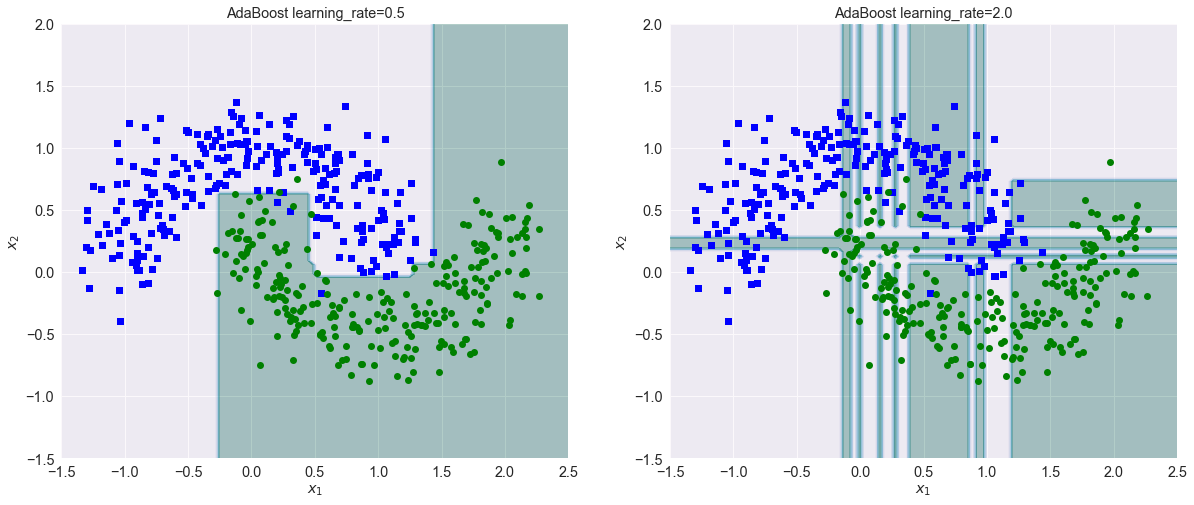

In [7]:
# plot decision boundaries for the tree and the bag
# Display results
fig2 = plt.figure(figsize=(20, 8))
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)

plot_decision_boundary(ada_clf, ax1, axlim)
plot_decision_boundary(ada1_clf, ax2, axlim)
# plot the observations
ax1.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
ax1.plot(X[:, 0][y==1], X[:, 1][y==1], "go")
ax1.set(xlabel='$x_1$', ylabel='$x_2$', title='AdaBoost learning_rate={}'.format(lrate0))

ax2.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
ax2.plot(X[:, 0][y==1], X[:, 1][y==1], "go")
ax2.set(xlabel='$x_1$', ylabel='$x_2$', title='AdaBoost learning_rate={}'.format(lrate1))

## AdaBoost and Gradient Boosting Regression

Using synthetic data.  
We generate quadratic data and fit two gradient boosting regressors

In [7]:
np.random.seed(0)  # fix the seed for reproducibily
n_samples = 1000   # total number of samples
sigma = 0.1        # noise volatility

XX = np.random.rand(n_samples, 1)  # from uniform [0, 1] distrobution
yy = 4 * (XX - 0.5) ** 2
yy = yy + sigma * np.random.randn(n_samples, 1)


Fit two gradient boosting models with different number of estimators (iterations)

In [8]:
n_est0 = 3
n_est1 = 100

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=n_est0, learning_rate=1.0, random_state=rnd_state)
gbrt.fit(XX, yy.ravel())

gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=n_est1, learning_rate=1.0, random_state=rnd_state)
gbrt1.fit(XX, yy.ravel())



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=123, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

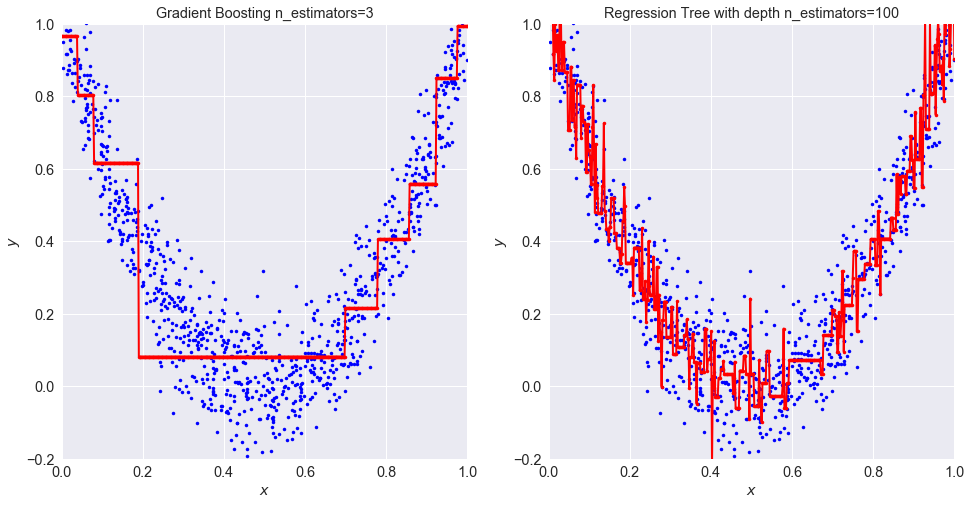

In [9]:
# Display results
fig3 = plt.figure(figsize=(16, 8))
ax1 = fig3.add_subplot(121)
ax2 = fig3.add_subplot(122)

plot_regression(gbrt, XX, yy, ax1,  [0, 1, -0.2, 1])
plot_regression(gbrt1, XX, yy, ax2,  [0, 1, -0.2, 1])

ax1.set(xlabel='$x$', ylabel='$y$')
ax1.set(title='Gradient Boosting n_estimators=' + str(n_est0))

ax2.set(xlabel='$x$', ylabel='$y$')
ax2.set(title='Regression Tree with depth n_estimators=' + str(n_est1));